In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_dir = '/content/drive/MyDrive/horse-or-human'

In [7]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images_from_directory(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, file)
                if img_path.endswith(('png')):
                    img = load_img(img_path, target_size=(150, 150))
                    img_array = img_to_array(img) / 255.0
                    images.append(img_array)
                    labels.append(label)
    print(f'Total images: {len(images)}')
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images_from_directory(data_dir)

Total images: 1027


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)
print(f'Train set: {X_train.shape[0]} images')
print(f'Test set: {X_test.shape[0]} images')

Train set: 821 images
Test set: 206 images


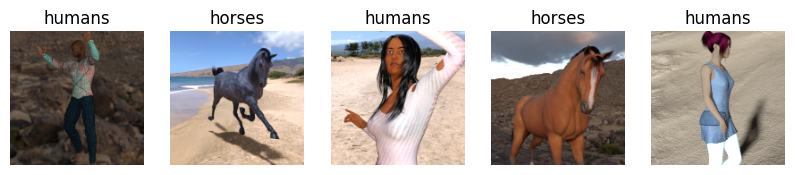

In [9]:
import matplotlib.pyplot as plt

def display_samples(images, labels, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

display_samples(X_train, y_train)

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), kernel_initializer=initializers.HeNormal()),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal()),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializers.HeNormal()),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_initializer=initializers.HeNormal()),
        layers.Dense(1, activation='sigmoid', kernel_initializer=initializers.GlorotUniform())
    ])
    return model

In [24]:
model = build_model()
model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy(), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

history = model.fit(X_train, y_train_encoded, epochs=4, validation_data=(X_test, y_test_encoded), verbose=1)

Epoch 1/4
26/26 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.6390 - loss: 5.7534 - val_accuracy: 0.8786 - val_loss: 0.2472
Epoch 2/4
26/26 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9382 - loss: 0.1488 - val_accuracy: 0.9515 - val_loss: 0.1279
Epoch 3/4
26/26 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9874 - loss: 0.0344 - val_accuracy: 0.9854 - val_loss: 0.0418
Epoch 4/4
26/26 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 1.0000 - loss: 0.0124 - val_accuracy: 0.9757 - val_loss: 0.0650


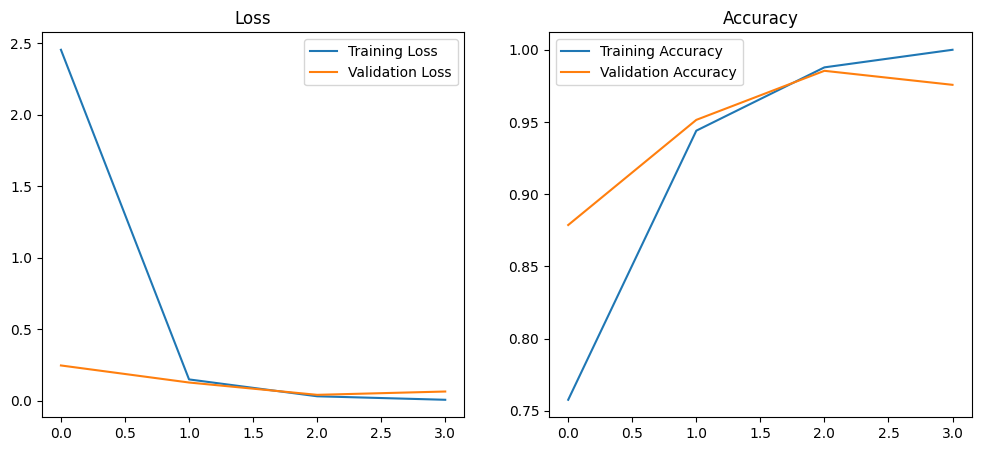

In [27]:
def plot_metrics(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Accuracy')
    ax2.legend()
    plt.show()

plot_metrics(history)

In [29]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.0650
Test Accuracy: 0.9757


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 885ms/step


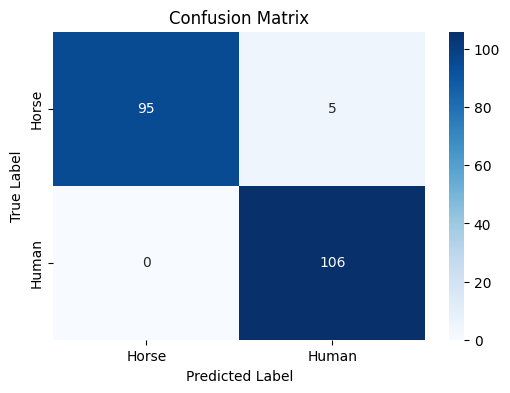

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Horse', 'Human'], yticklabels=['Horse', 'Human'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [33]:
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=['Horse', 'Human']))


Classification Report:
              precision    recall  f1-score   support

       Horse       1.00      0.95      0.97       100
       Human       0.95      1.00      0.98       106

    accuracy                           0.98       206
   macro avg       0.98      0.97      0.98       206
weighted avg       0.98      0.98      0.98       206



In [34]:
def train_with_params(learning_rate, batch_size, neurons):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(neurons, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=4, batch_size=batch_size, verbose=1)
    return history


Training with learning_rate=0.001, batch_size=32, neurons=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
26/26 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5633 - loss: 1.4393 - val_accuracy: 0.9223 - val_loss: 0.1474
Epoch 2/4
26/26 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9702 - loss: 0.0789 - val_accuracy: 0.8932 - val_loss: 0.2937
Epoch 3/4
26/26 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9763 - loss: 0.0513 - val_accuracy: 0.9854 - val_loss: 0.0445
Epoch 4/4
26/26 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9981 - loss: 0.0074 - val_accuracy: 0.9951 - val_loss: 0.0174


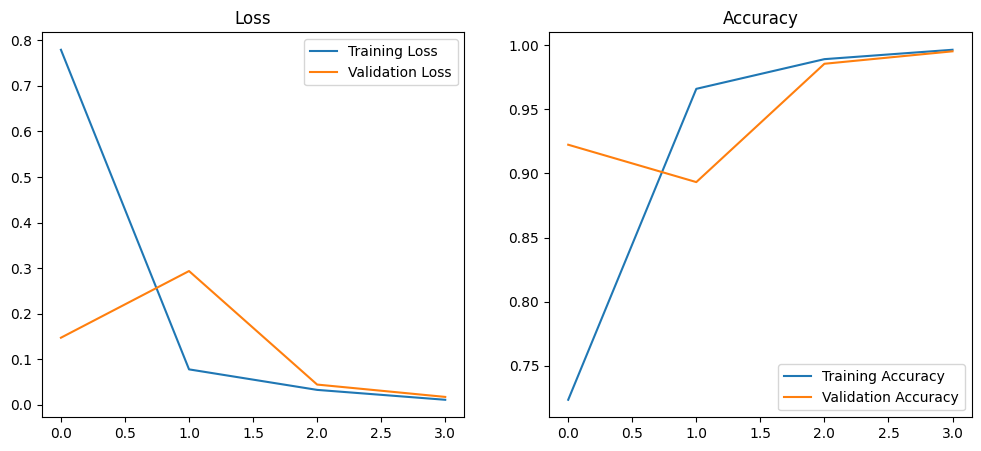


Training with learning_rate=0.0005, batch_size=64, neurons=64
Epoch 1/4
13/13 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.5337 - loss: 1.9085 - val_accuracy: 0.4854 - val_loss: 0.6909
Epoch 2/4
13/13 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.5808 - loss: 0.6804 - val_accuracy: 0.8252 - val_loss: 0.6288
Epoch 3/4
13/13 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.8356 - loss: 0.5925 - val_accuracy: 0.8544 - val_loss: 0.4556
Epoch 4/4
13/13 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.8892 - loss: 0.3791 - val_accuracy: 0.8981 - val_loss: 0.2437


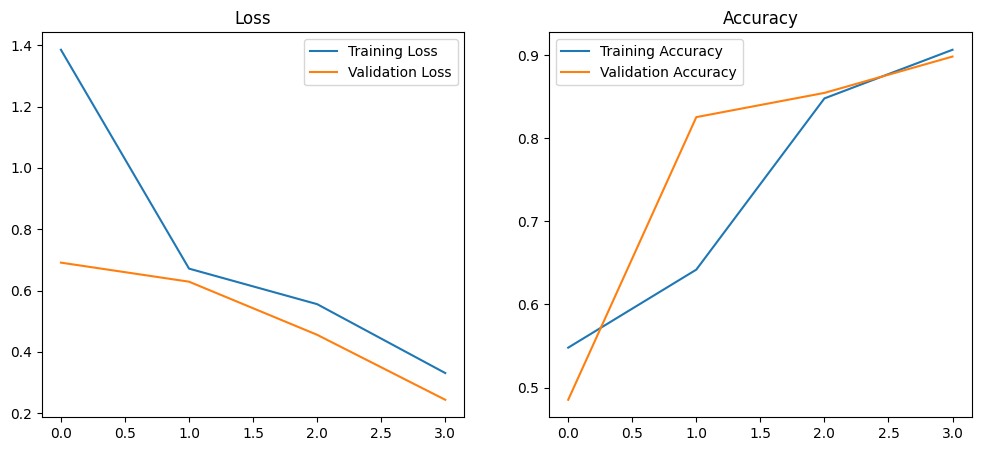


Training with learning_rate=0.0001, batch_size=128, neurons=32
Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.5135 - loss: 0.6861 - val_accuracy: 0.8010 - val_loss: 0.6514
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step - accuracy: 0.6501 - loss: 0.6536 - val_accuracy: 0.6068 - val_loss: 0.6163
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step - accuracy: 0.6554 - loss: 0.5960 - val_accuracy: 0.8350 - val_loss: 0.5626
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step - accuracy: 0.8571 - loss: 0.5405 - val_accuracy: 0.8204 - val_loss: 0.4971


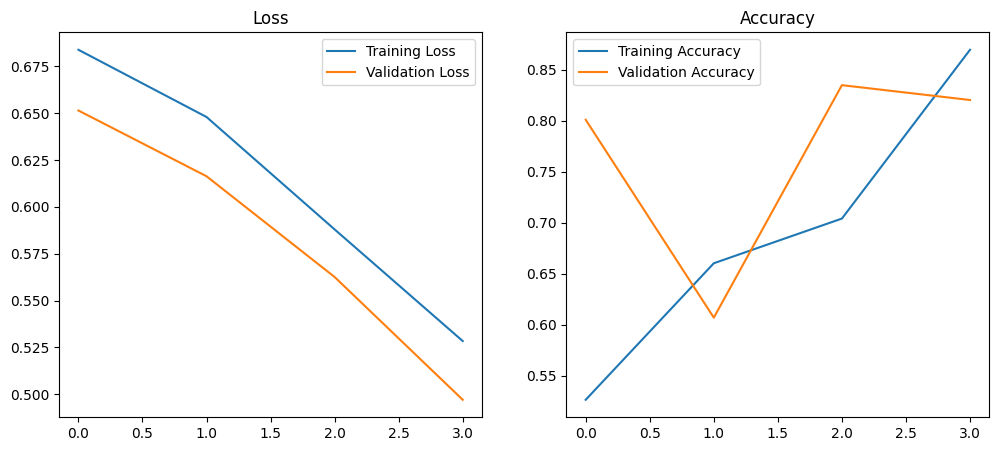

In [35]:
configs = [ (0.001, 32, 128), (0.0005, 64, 64), (0.0001, 128, 32) ]

for config in configs:
    learning_rate, batch_size, neurons = config
    print(f"\nTraining with learning_rate={learning_rate}, batch_size={batch_size}, neurons={neurons}")
    history = train_with_params(learning_rate, batch_size, neurons)
    plot_metrics(history)

Epoch 1/4
26/26 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.6635 - loss: 0.9171 - val_accuracy: 0.9175 - val_loss: 0.4075
Epoch 2/4
26/26 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9521 - loss: 0.3252 - val_accuracy: 0.9757 - val_loss: 0.2497
Epoch 3/4
26/26 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9822 - loss: 0.2145 - val_accuracy: 0.9806 - val_loss: 0.2175
Epoch 4/4
26/26 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9684 - loss: 0.2238 - val_accuracy: 0.9272 - val_loss: 0.2983


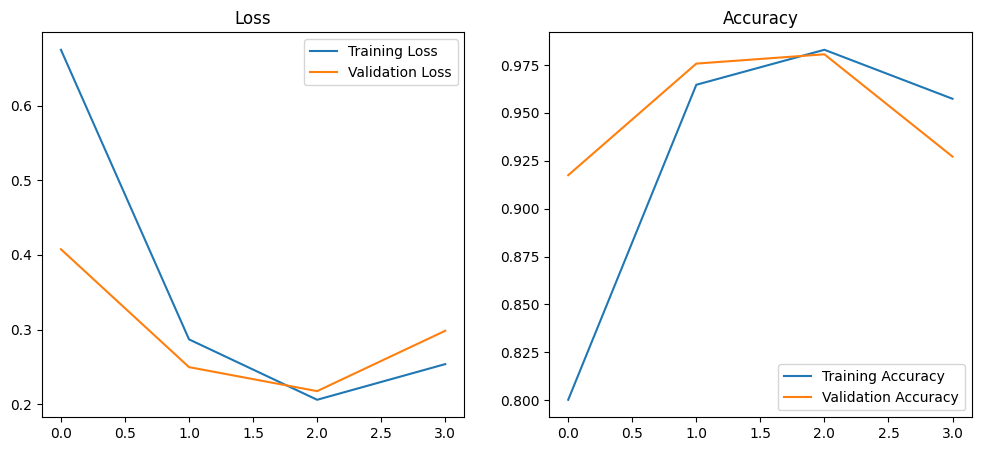

In [37]:
from tensorflow.keras import regularizers

def build_regularized_model(dropout_rate=0.3, l2_lambda=0.001):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

model_reg = build_regularized_model(dropout_rate=0.3, l2_lambda=0.001)
model_reg.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history_reg = model_reg.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=4, batch_size=32, verbose=1)
plot_metrics(history_reg)
